In [1]:
from braket.circuits import Circuit, Observable, Gate, Noise
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
import numpy as np
from scipy.stats import unitary_group

In [32]:
circ = Circuit().h(0).cnot(0,1)

### With Noise

In [33]:
# defining a noisy channel
noise = Noise.BitFlip(probability=0.1)

In [34]:
#adding noise to every gate in circuit
circ.apply_gate_noise(noise)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(0)])), Instruction('operator': BitFlip(0.1), 'target': QubitSet([Qubit(1)]))])

In [35]:
# select the local noise simulator
device = LocalSimulator('braket_dm')

In [36]:
# run the circuit on the local simulator
result = device.run(circ, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 440, '11': 365, '10': 119, '01': 76})


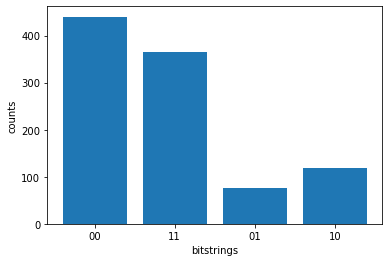

In [37]:
# plot histogram
import matplotlib.pyplot as plt
import time
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

### Without Noise

In [38]:
circ = Circuit().h(0).cnot(0,1)

In [39]:
device=LocalSimulator()

In [40]:
# run the circuit on the local simulator
result = device.run(circ, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 510, '11': 490})


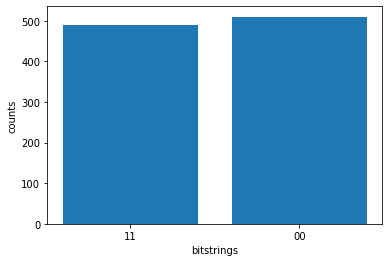

In [41]:
# plot histogram
import matplotlib.pyplot as plt
import time
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

### Predefined Noise Channels
The pre-defined single-qubit noise channels include BitFlip, PhaseFlip, Depolarizing, AmplitudeDamping, GeneralizedAmplitudeDamping, PhaseDamping and PauliChannel. The pre-defined two-qubit noise channels include TwoQubitDepolarizing and TwoQubitDephasing.

In [56]:
# defining a noisy channel with bitflip increased probability
noise = Noise.BitFlip(probability=0.5)

In [57]:
circ1 = Circuit().h(0).cnot(0,1)

In [58]:
#adding noise to every gate in circuit
circ1.apply_gate_noise(noise)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': BitFlip(0.5), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': BitFlip(0.5), 'target': QubitSet([Qubit(0)])), Instruction('operator': BitFlip(0.5), 'target': QubitSet([Qubit(1)]))])

In [59]:
# select the local noise simulator
device = LocalSimulator('braket_dm')

In [60]:
# run the circuit on the local simulator
result = device.run(circ1, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 256, '00': 256, '01': 250, '10': 238})


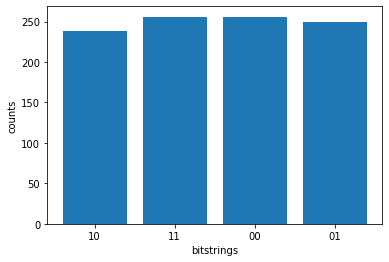

In [61]:
# plot histogram
import matplotlib.pyplot as plt
import time
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');